In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [5]:
ticker = 'AAPL'  # Example ticker
start_date = datetime.now() - timedelta(days=365)  # 1 year of data
end_date = datetime.now()

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Calculate On-Balance Volume (OBV)
data['Daily Change'] = data['Adj Close'].diff()

# Determine the direction based on daily price change
data['Direction'] = 0
data.loc[data['Daily Change'] > 0, 'Direction'] = 1
data.loc[data['Daily Change'] < 0, 'Direction'] = -1

# Calculate the OBV as a cumulative sum (needs fixing)
data['OBV'] = (data['Volume'] * data['Direction']).cumsum()

# Print to check
print(data[['Adj Close', 'Volume', 'OBV']].head())

ValueError: Cannot set a DataFrame with multiple columns to the single column OBV

KeyError: 'OBV'

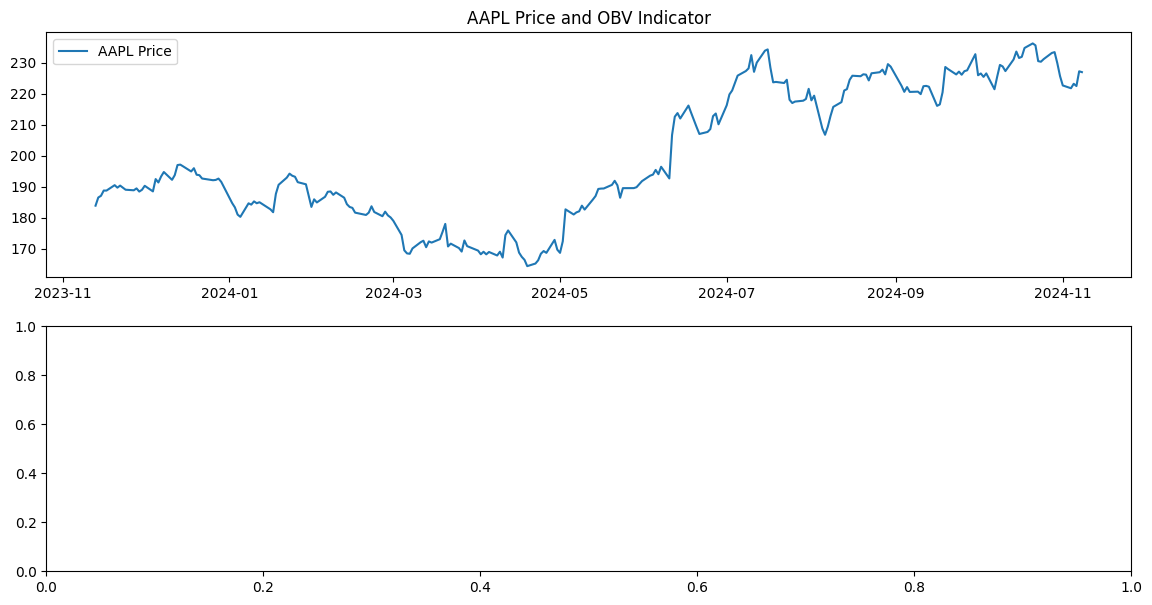

In [7]:
# Plotting OBV
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label=f'{ticker} Price')
plt.title(f'{ticker} Price and OBV Indicator')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['OBV'], color='orange', label='OBV')
plt.xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()